In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the data.
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
# Model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features="sqrt",
    oob_score=True,
    random_state=42
)

In [4]:
# Train
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

In [5]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", rf.oob_score_)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
OOB Score: 0.9560439560439561
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



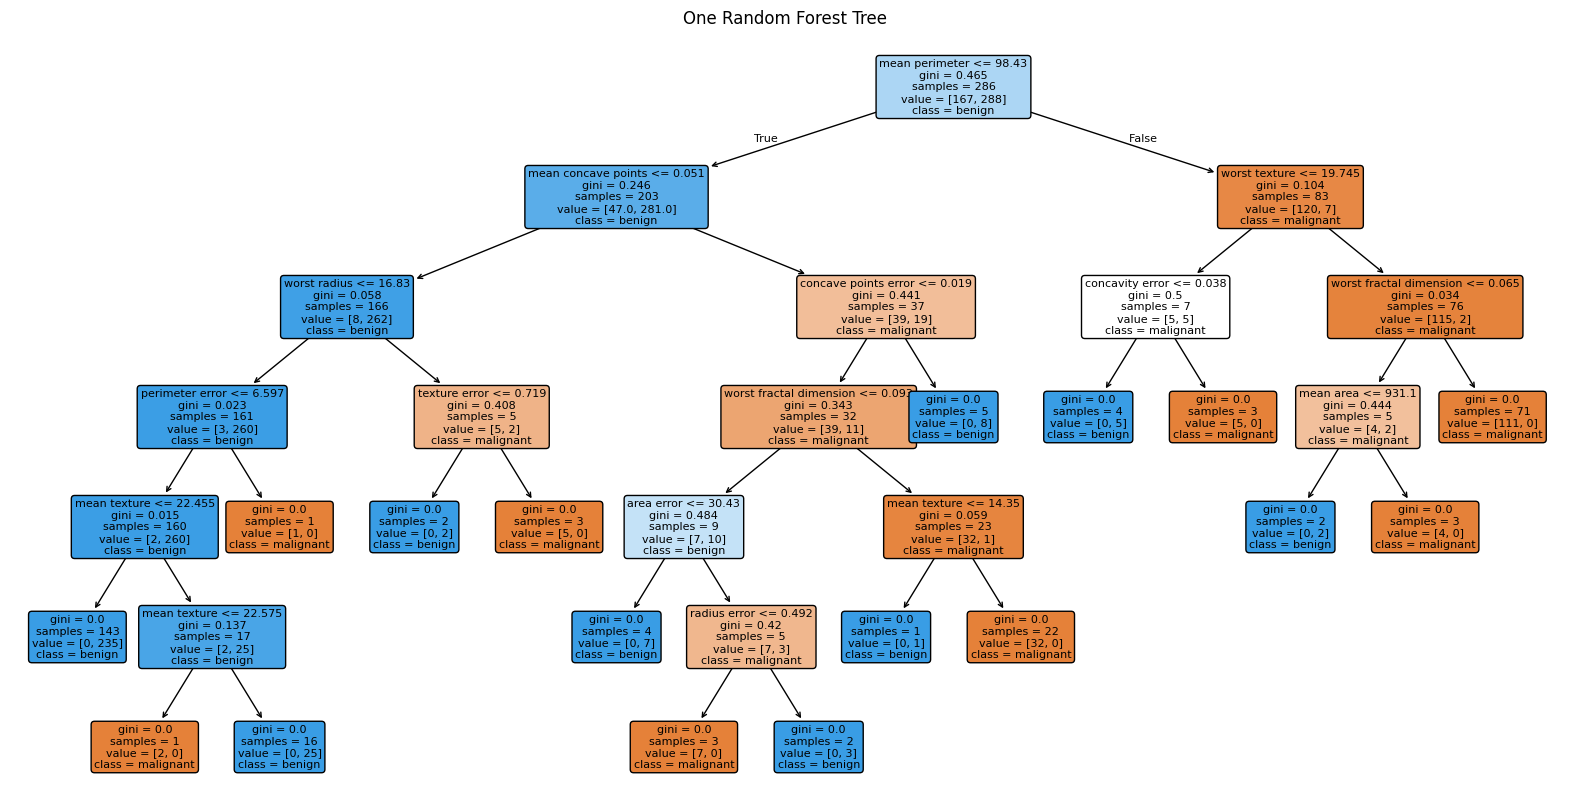

In [6]:
# ============================
# Visualize ONE tree
# ============================

# Pick first tree from forest
tree = rf.estimators_[8]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("One Random Forest Tree")
plt.show()

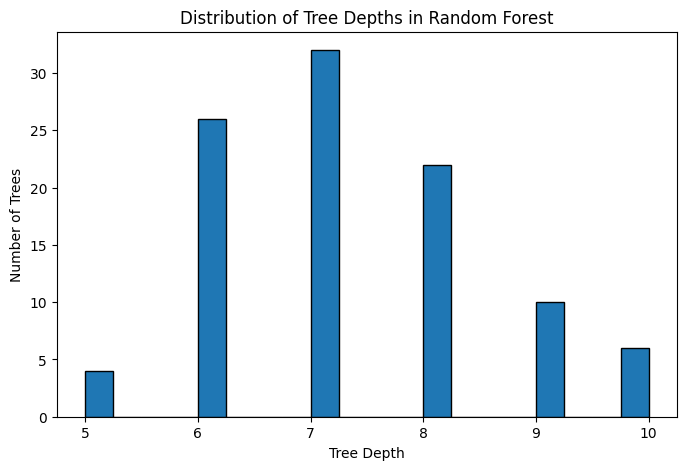

In [7]:
# ============================
# Visualize tree depth distribution
# ============================

depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

plt.figure(figsize=(8, 5))
plt.hist(depths, bins=20, edgecolor="black")
plt.title("Distribution of Tree Depths in Random Forest")
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
import numpy as np

kfold = KFold(n_splits=6, shuffle=True, random_state=42)

scores_kfold = cross_val_score(rf, X_train, y_train, cv=kfold)

print("K-Fold Accuracy Scores:", scores_kfold)
print("Mean K-Fold Accuracy:", np.mean(scores_kfold))

K-Fold Accuracy Scores: [0.94736842 0.97368421 0.96052632 0.96052632 0.97368421 0.93333333]
Mean K-Fold Accuracy: 0.958187134502924
